In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorboard as tb

In [2]:
#experiment_id = "fL8jM1JXTbC5SnpQ90JWlQ"
#experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
#df = experiment.get_scalars()
#df.to_csv("results_logs.tsv", sep="\t", index=False)
#df

In [6]:
df = pd.read_csv("results_logs.tsv", sep="\t")
df.rename(columns={"run": "Method", "tag": "Feature", "value": "AUPRC"}, inplace=True)
df

,Method,Feature,step,AUPRC
0,DNABERT,auprc_DHS_Ath_flower_14_days,27080,0.634451
1,DNABERT,auprc_DHS_Ath_inflorescence_normal,27080,0.440137
2,DNABERT,auprc_DHS_Ath_leaf_normal,27080,0.465153
3,DNABERT,auprc_DHS_Ath_open_flower_normal,27080,0.505751
4,DNABERT,auprc_DHS_Ath_root_7_days,27080,0.574621
...,...,...,...,...
8463,version_5,val_neg_median_auroc,20069,-0.928403
8464,version_5,val_neg_median_auroc,23414,-0.927481
8465,version_5,val_neg_median_auroc,26759,-0.928805
8466,version_5,val_neg_median_auroc,30104,-0.928532


In [7]:
df.Method.replace({"version_5": "PlantBert"}, inplace=True)
df = df[df.Method.isin(["DeepSEA", "DNABERT", "PlantBert"])]
df

,Method,Feature,step,AUPRC
0,DNABERT,auprc_DHS_Ath_flower_14_days,27080,0.634451
1,DNABERT,auprc_DHS_Ath_inflorescence_normal,27080,0.440137
2,DNABERT,auprc_DHS_Ath_leaf_normal,27080,0.465153
3,DNABERT,auprc_DHS_Ath_open_flower_normal,27080,0.505751
4,DNABERT,auprc_DHS_Ath_root_7_days,27080,0.574621
...,...,...,...,...
8463,PlantBert,val_neg_median_auroc,20069,-0.928403
8464,PlantBert,val_neg_median_auroc,23414,-0.927481
8465,PlantBert,val_neg_median_auroc,26759,-0.928805
8466,PlantBert,val_neg_median_auroc,30104,-0.928532


In [8]:
df = df[df.Feature.str.startswith("auprc")]
df["Feature class"] = df.Feature.str.split("_").str[1]
df

/tmp/ipykernel_32446/3946638785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Feature class"] = df.Feature.str.split("_").str[1]


,Method,Feature,step,AUPRC,Feature class
0,DNABERT,auprc_DHS_Ath_flower_14_days,27080,0.634451,DHS
1,DNABERT,auprc_DHS_Ath_inflorescence_normal,27080,0.440137,DHS
2,DNABERT,auprc_DHS_Ath_leaf_normal,27080,0.465153,DHS
3,DNABERT,auprc_DHS_Ath_open_flower_normal,27080,0.505751,DHS
4,DNABERT,auprc_DHS_Ath_root_7_days,27080,0.574621,DHS
...,...,...,...,...,...
6907,PlantBert,auprc_TFBS_AT5G63790_Ath_seedling_normal,33450,0.262692,TFBS
6908,PlantBert,auprc_TFBS_AT5G65310_Ath_seedling_ABA_treatmen...,33450,0.670793,TFBS
6909,PlantBert,auprc_TFBS_AT5G65310_Ath_seedling_normal,33450,0.672918,TFBS
6910,PlantBert,auprc_TFBS_AT5G67300_Ath_seedling_ABA_treatmen...,33450,0.698629,TFBS


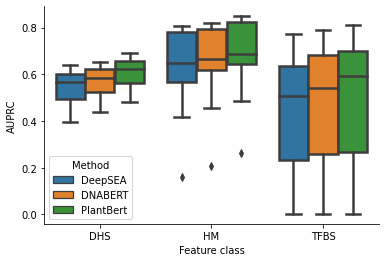

In [31]:
method_order = ["DeepSEA", "DNABERT", "PlantBert"]
sns.boxplot(x="Feature class", y="AUPRC", hue="Method", data=df, hue_order=method_order, linewidth=2.5);
sns.despine()
plt.savefig("boxplot.svg", bbox_inches='tight')

In [15]:
df2 = df.pivot(index='Feature', columns='Method', values='AUPRC')

In [16]:
df2["Feature class"] = df2.index.str.split("_").str[1]
df2

Method,DNABERT,DeepSEA,PlantBert,Feature class
Feature,,,,
auprc_DHS_Ath_flower_14_days,0.634451,0.614921,0.677004,DHS
auprc_DHS_Ath_inflorescence_normal,0.440137,0.439895,0.492293,DHS
auprc_DHS_Ath_leaf_normal,0.465153,0.444190,0.504962,DHS
auprc_DHS_Ath_open_flower_normal,0.505751,0.484843,0.548213,DHS
auprc_DHS_Ath_root_7_days,0.574621,0.555127,0.609742,DHS
...,...,...,...,...
auprc_TFBS_AT5G63790_Ath_seedling_normal,0.245625,0.212799,0.262692,TFBS
auprc_TFBS_AT5G65310_Ath_seedling_ABA_treatment_for_4h,0.662923,0.606286,0.670793,TFBS
auprc_TFBS_AT5G65310_Ath_seedling_normal,0.670756,0.610986,0.672918,TFBS


In [21]:
max_val = df2.PlantBert.max()
max_val

0.8485589027404785

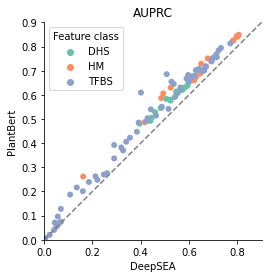

In [29]:
sns.scatterplot(data=df2, x="DeepSEA", y="PlantBert", hue="Feature class", palette="Set2", linewidth=0)
plt.xlim([0, 0.9])
plt.ylim([0, 0.9])
sns.despine()
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.title("AUPRC")
plt.gca().set_aspect('equal', 'box')
plt.savefig("plantbert_vs_deepsea.svg", bbox_inches='tight')

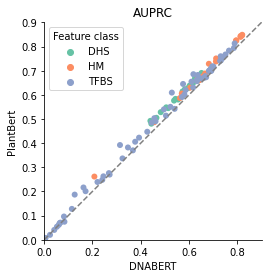

In [30]:
sns.scatterplot(data=df2, x="DNABERT", y="PlantBert", hue="Feature class", palette="Set2", linewidth=0)
plt.xlim([0, 0.9])
plt.ylim([0, 0.9])
sns.despine()
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.title("AUPRC")
plt.gca().set_aspect('equal', 'box')
plt.savefig("plantbert_vs_dnabert.svg", bbox_inches='tight')